# Denny's EDA

This doc will answer the following questions:
What kind of data

0. Imports
1. Load the data (preprocess for train only)
2. Size, shape, features, and outcome variable (statistics)
3. Univariate analysis
4. Multivariate analysis and correlations
5. Outlier


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

a4_dims = (11.7, 8.27) # for plotting

# 1. Load data
In this section, we'll explain where the raw data comes from and do light analysis. Then, we'll split the data into training and test and set the test data aside. We'll load the training data for deeper exploratory data analysis (EDA).


In [2]:
os.chdir('..')
os.chdir('..')
os.getcwd()

'C:\\Users\\slin2\\Documents\\GitHub\\power_production_w207_final_project_2022'

## 1.1 Raw Data
Our data is the solar generation dataset from Kaggle. The data consists of 2 photovoltaic solar power plants in India over a 34 day period. Each plant has its own weather and electricity production data. In total, there are 4 files in the dataset, listed here:
1. plant_1_generation_data.csv
2. plant_2_generation_data.csv
3. plant_1_weather_sensor_data.csv
4. plant_2_weather_sensor_data.csv

make a table to show the name of the file, the contents, the number of rows (records) and the field names.


In [3]:
plant_1_generation = pd.read_csv('raw_data/Plant_1_Generation_Data.csv') 
plant_1_weather_sensor = pd.read_csv('raw_data/Plant_1_Weather_Sensor_Data.csv') 
plant_2_generation = pd.read_csv('raw_data/Plant_2_Generation_Data.csv')
plant_2_weather_sensor = pd.read_csv('raw_data/Plant_2_Weather_Sensor_Data.csv') 

In [4]:
print('file name',' '*22,'df.shape')
print('Plant_1_Generation_Data.csv     ',plant_1_generation.shape) #, list(plant_1_generation.columns))
print('Plant_2_Generation_Data.csv     ',plant_2_generation.shape)
print('Plant_1_Weather_Sensor_Data.csv  ',plant_1_weather_sensor.shape)
print('Plant_2_Weather_Sensor_Data.csv  ',plant_2_weather_sensor.shape)
print('\nGeneration data column names:')
print(list(plant_1_generation.columns))
print('\nWeather data column names:')
print(list(plant_1_weather_sensor.columns))

file name                        df.shape
Plant_1_Generation_Data.csv      (68778, 7)
Plant_2_Generation_Data.csv      (67698, 7)
Plant_1_Weather_Sensor_Data.csv   (3182, 6)
Plant_2_Weather_Sensor_Data.csv   (3259, 6)

Generation data column names:
['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']

Weather data column names:
['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']


In [5]:
plant_1_generation.dtypes

DATE_TIME       object
PLANT_ID         int64
SOURCE_KEY      object
DC_POWER       float64
AC_POWER       float64
DAILY_YIELD    float64
TOTAL_YIELD    float64
dtype: object

array([[<AxesSubplot:title={'center':'PLANT_ID'}>,
        <AxesSubplot:title={'center':'DC_POWER'}>],
       [<AxesSubplot:title={'center':'AC_POWER'}>,
        <AxesSubplot:title={'center':'DAILY_YIELD'}>],
       [<AxesSubplot:title={'center':'TOTAL_YIELD'}>, <AxesSubplot:>]],
      dtype=object)

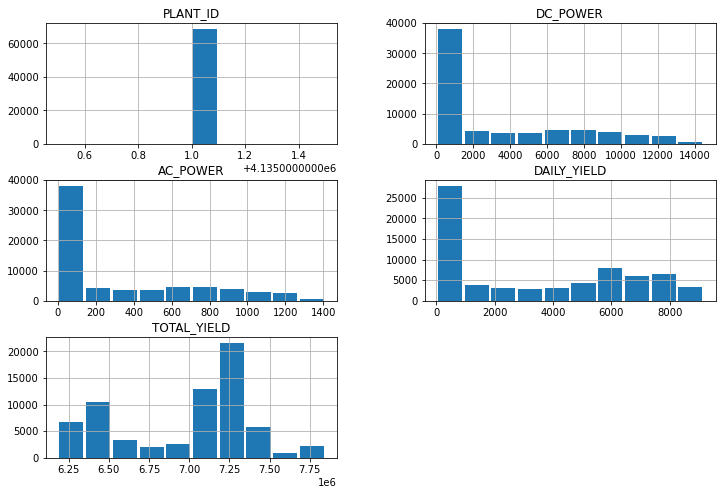

In [6]:
hist_config = {'figsize':(12,8), 'rwidth':0.9} #can also try figsize (15,10)
# hist_config = {'figsize':(9,6), 'rwidth':0.4, 'xlabelsize':6, 'grid':False} #can also try figsize (15,10)
plant_1_generation.hist(**hist_config)

array([[<AxesSubplot:title={'center':'PLANT_ID'}>,
        <AxesSubplot:title={'center':'DC_POWER'}>],
       [<AxesSubplot:title={'center':'AC_POWER'}>,
        <AxesSubplot:title={'center':'DAILY_YIELD'}>],
       [<AxesSubplot:title={'center':'TOTAL_YIELD'}>, <AxesSubplot:>]],
      dtype=object)

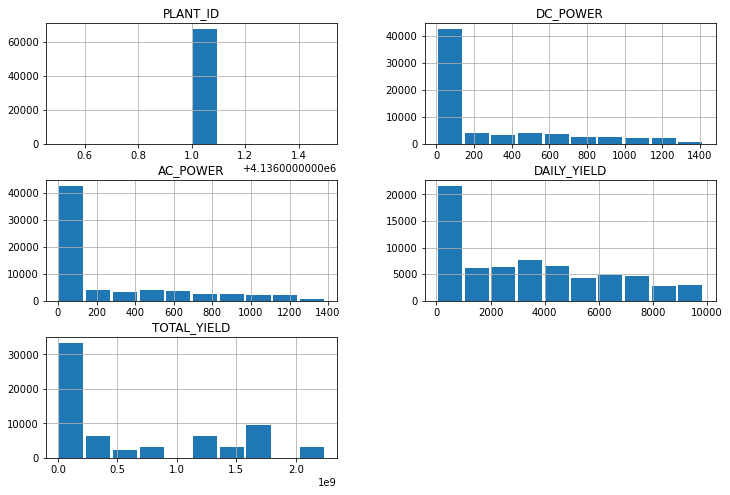

In [7]:
plant_2_generation.hist(**hist_config)

# Weather Data Histograms

array([[<AxesSubplot:title={'center':'PLANT_ID'}>,
        <AxesSubplot:title={'center':'AMBIENT_TEMPERATURE'}>],
       [<AxesSubplot:title={'center':'MODULE_TEMPERATURE'}>,
        <AxesSubplot:title={'center':'IRRADIATION'}>]], dtype=object)

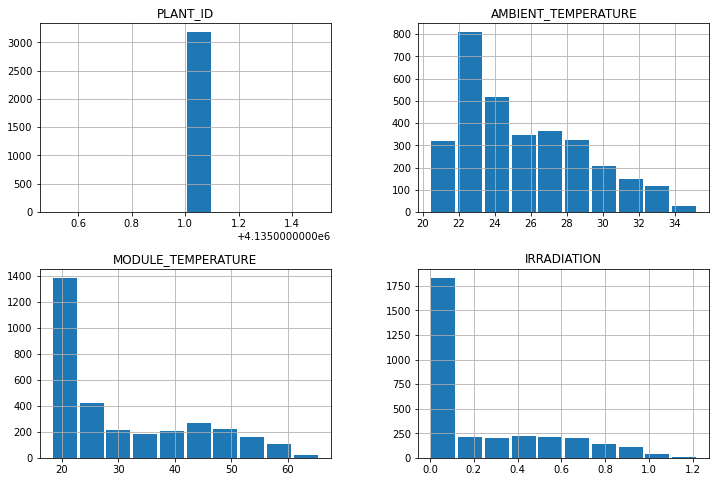

In [8]:
plant_1_weather_sensor.hist(**hist_config)

array([[<AxesSubplot:title={'center':'PLANT_ID'}>,
        <AxesSubplot:title={'center':'AMBIENT_TEMPERATURE'}>],
       [<AxesSubplot:title={'center':'MODULE_TEMPERATURE'}>,
        <AxesSubplot:title={'center':'IRRADIATION'}>]], dtype=object)

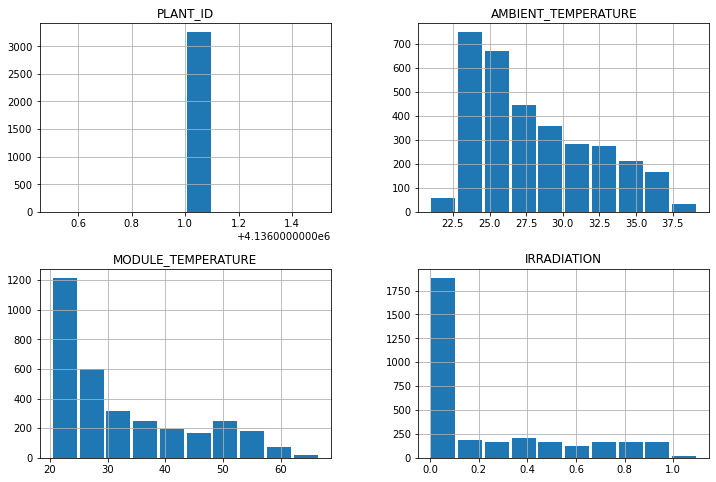

In [9]:
plant_2_weather_sensor.hist(**hist_config)

## Number of unique inverters across both pl

In [95]:
# How many total inverters
len(set(plant_2_generation.SOURCE_KEY).union(set(plant_1_generation.SOURCE_KEY)))

44

## Analysis of power size
The raw data has a scaling issue that makes plant 1's DC power appear 10x higher than it should. We correct this issue in the data preprocessing script.

In [10]:
# engineer time to be in correct format
plant_1_generation['DATE_TIME'] = pd.to_datetime(plant_1_generation['DATE_TIME']).dt.strftime('%Y-%m-%d %H:%M:%S')

Text(0.5, 1.0, 'DC power at plant 1 appears to be 10x higher than plant 2')

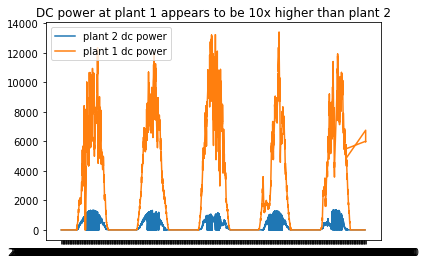

In [11]:
date_filter = plant_2_generation['DATE_TIME'] < '2020-05-20'
plt.plot(plant_2_generation[date_filter].DATE_TIME,plant_2_generation[date_filter].DC_POWER,label='plant 2 dc power')
date_filter = (plant_1_generation['DATE_TIME'] < '2020-05-20')&(plant_1_generation['DATE_TIME'] >= '2020-05-15')
plt.plot(plant_1_generation[date_filter].DATE_TIME,plant_1_generation[date_filter].DC_POWER,label='plant 1 dc power')
plt.legend()
plt.title('DC power at plant 1 appears to be 10x higher than plant 2')
# plant_1_generation[plant_1_generation['DATE_TIME'].isin(['2020-05-20'])]

Text(0.5, 1.0, 'DC power at plant 1 appears to be 10x higher than plant 1s AC power.\nWe would expect these to be within 5% of each other')

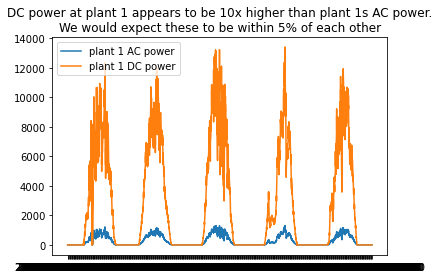

In [12]:
date_filter = (plant_1_generation['DATE_TIME'] < '2020-05-20')&(plant_1_generation['DATE_TIME'] >= '2020-05-15')
plt.plot(plant_1_generation[date_filter].DATE_TIME,plant_1_generation[date_filter].AC_POWER,label='plant 1 AC power')

plt.plot(plant_1_generation[date_filter].DATE_TIME,plant_1_generation[date_filter].DC_POWER,label='plant 1 DC power')

plt.legend()
plt.title('DC power at plant 1 appears to be 10x higher than plant 1s AC power.\nWe would expect these to be within 5% of each other')

## 1.2 Train data
The entire data set should not be used for EDA. EDA helps data scientists understand the data and analyze features. EDA can elevate good models to great ones through data transformations and initial investigation. Since our test data needs to act as an evaluation of the final model built, we should not look at that data. The test data set will be set aside to later evaluate the model.
In this section, we'll load the training data which was created by a data preprocessing script.

In [13]:
file_name = 'processed_data/train_df.csv'
df = pd.read_csv(file_name)
df.head()
df.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE',
       'MODULE_TEMPERATURE', 'IRRADIATION', 'WEATHER_SOURCE', 'DATE', 'TIME',
       'is_daytime'],
      dtype='object')

### dtypes
The dataset has an unnamed column, a date time column that should be a datetime object, and plant_id which should be a string. Here, we convert them.

In [14]:
df.dtypes

DATE_TIME               object
PLANT_ID                 int64
SOURCE_KEY              object
DC_POWER               float64
AC_POWER               float64
DAILY_YIELD            float64
TOTAL_YIELD            float64
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
WEATHER_SOURCE          object
DATE                    object
TIME                    object
is_daytime               int64
dtype: object

In [15]:
df.columns = df.columns.str.strip()
df.loc[:,'DATE_TIME'] = pd.to_datetime(df.DATE_TIME)
df.loc[:,'PLANT_ID'] = df.PLANT_ID.astype(str)
# df = df.drop(columns='Unnamed: 0')
print('DataFrame column types: \n',df.dtypes)


DataFrame column types: 
 DATE_TIME              datetime64[ns]
PLANT_ID                       object
SOURCE_KEY                     object
DC_POWER                      float64
AC_POWER                      float64
DAILY_YIELD                   float64
TOTAL_YIELD                   float64
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
WEATHER_SOURCE                 object
DATE                           object
TIME                           object
is_daytime                      int64
dtype: object


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109180 entries, 0 to 109179
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   DATE_TIME            109180 non-null  datetime64[ns]
 1   PLANT_ID             109180 non-null  object        
 2   SOURCE_KEY           109180 non-null  object        
 3   DC_POWER             109180 non-null  float64       
 4   AC_POWER             109180 non-null  float64       
 5   DAILY_YIELD          109180 non-null  float64       
 6   TOTAL_YIELD          109180 non-null  float64       
 7   AMBIENT_TEMPERATURE  109176 non-null  float64       
 8   MODULE_TEMPERATURE   109176 non-null  float64       
 9   IRRADIATION          109176 non-null  float64       
 10  WEATHER_SOURCE       109176 non-null  object        
 11  DATE                 109180 non-null  object        
 12  TIME                 109180 non-null  object        
 13  is_daytime    

In [17]:
file_name = r'raw_data/Plant_1_Weather_Sensor_Data.csv'
wdf = pd.read_csv(file_name)
wdf.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


In [18]:
wdf.SOURCE_KEY.unique()

array(['HmiyD2TTLFNqkNe'], dtype=object)

## 2. Analyze basic information
How much data is there?
What is the outcome variable?
What are the features?
What is the distribution of features?
How does the data look over time?

## 2.1 Time Analysis

In [19]:
if df.index.name != "DATE_TIME":
    df = df.set_index("DATE_TIME")
min_date = min(df.index)
max_date = max(df.index)
print('the min and max dates in plant 1 are ',min_date, max_date)

the min and max dates in plant 1 are  2020-05-15 00:00:00 2020-06-11 23:45:00


<AxesSubplot:xlabel='DATE_TIME'>

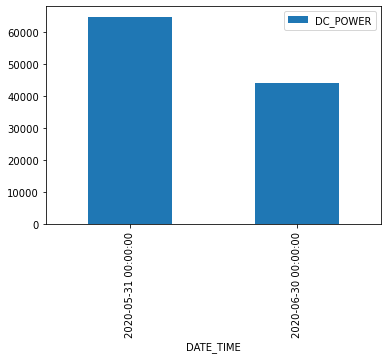

In [20]:
freq = 'd'
temp = df.groupby(pd.Grouper(freq='m')).count()
temp[['DC_POWER']].plot.bar()

Text(0.5, 0, 'month')

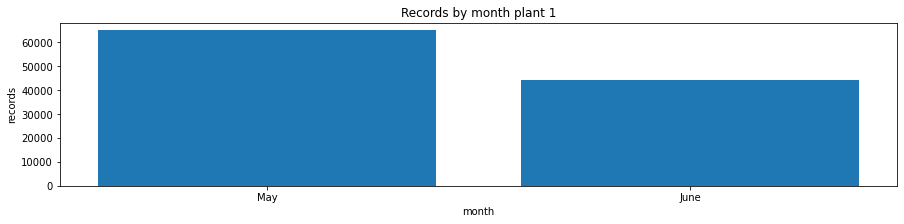

In [21]:
# temp.index.month_name
temp = df.groupby(pd.Grouper(freq='m')).count()
fig, ax = plt.subplots(figsize=(15,3))
ax.bar(temp.index.strftime('%B'),temp.DC_POWER)
ax.set_title('Records by month plant 1')
ax.set_ylabel('records')
ax.set_xlabel('month')

<BarContainer object of 2687 artists>

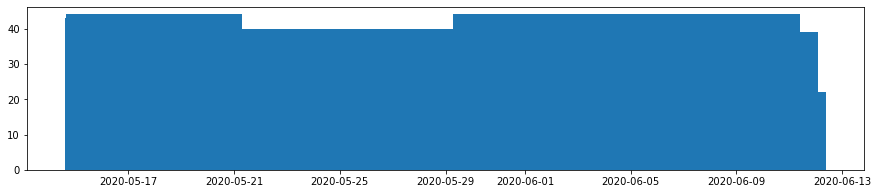

In [22]:
temp.index.time
temp = df.groupby(pd.Grouper(freq='s')).count()
temp = temp.loc[~(temp==0).all(axis=1)]
fig, ax = plt.subplots(figsize=(15,3))
ax.bar(temp.index,temp.DC_POWER)

In [23]:
df.resample('H').DC_POWER.count()
# data.resample('H', on='created_at').price.sum(

DATE_TIME
2020-05-15 00:00:00    172
2020-05-15 01:00:00    174
2020-05-15 02:00:00    172
2020-05-15 03:00:00    172
2020-05-15 04:00:00    175
                      ... 
2020-06-11 19:00:00     88
2020-06-11 20:00:00     88
2020-06-11 21:00:00     88
2020-06-11 22:00:00     88
2020-06-11 23:00:00     88
Freq: H, Name: DC_POWER, Length: 672, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

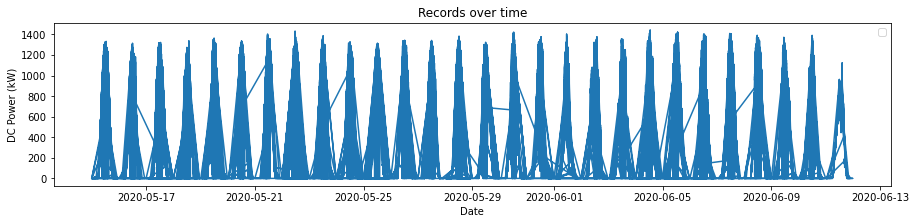

In [24]:
fig = plt.figure()
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(df.index,df.DC_POWER)
df.head()
ax.set_title('Records over time')
ax.set_ylabel('DC Power (kW)')
ax.set_xlabel('Date')
ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 432x288 with 0 Axes>

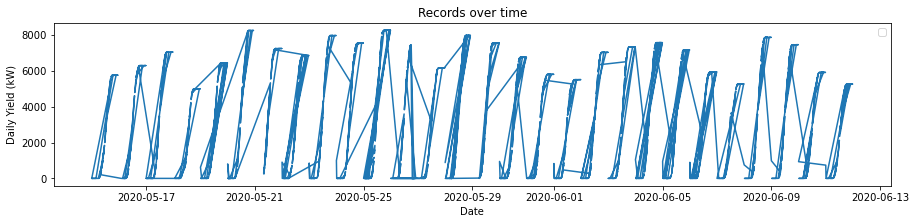

In [80]:
source_id = '1BY6WEcLGh8j5v7'
fig = plt.figure()
fig, ax = plt.subplots(figsize=(15,3))
ax.plot(df[df['SOURCE_KEY'] == source_id].index,df[df['SOURCE_KEY'] == source_id].DAILY_YIELD)
df.head()
ax.set_title('Records over time')
ax.set_ylabel('Daily Yield (kW)')
ax.set_xlabel('Date')
ax.legend()

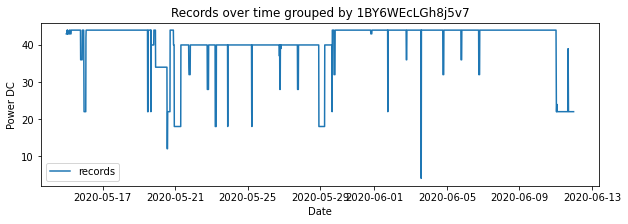

In [25]:
# df = df.set_index('DATE_TIME')
source_id = '1BY6WEcLGh8j5v7'
# date_window = 
# temp = df[df['SOURCE_KEY'] == source_id].loc['20']
temp.head()
fig, ax = plt.subplots(figsize=(10,3))
ax.plot(temp.index, temp['DC_POWER'], label='records')
ax.set_title('Records over time grouped by {}'.format(source_id))
ax.set_ylabel('Power DC')
ax.set_xlabel('Date')
ax.legend()

In [26]:
df_gen=df.groupby('DATE_TIME').sum().reset_index()
df_gen['time']=df_gen['DATE_TIME'].dt.time
len(df_gen.DATE_TIME.unique())


2687

C:\Users\slin2\AppData\Local\Temp\ipykernel_20932\52252335.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_gen.set_index('time').drop('DATE_TIME',1)[['AC_POWER','DC_POWER']].plot(style='o')


<AxesSubplot:xlabel='time'>

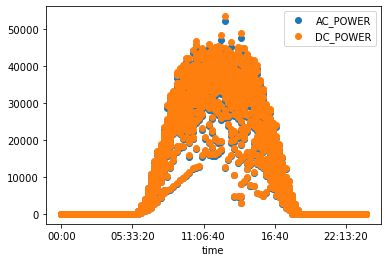

In [27]:
df_gen.set_index('time').drop('DATE_TIME',1)[['AC_POWER','DC_POWER']].plot(style='o')


# 3 Univariate analysis

## When is there daylight?
Daylight is likely a good predictor of solar energy generation since light is needed to produce electricity. In this section, we investigate when the sun is out

<AxesSubplot:xlabel='DATE_TIME'>

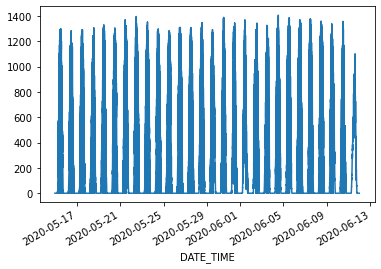

In [28]:
# there is a change in solar generation over time of day
df.AC_POWER.plot()

<AxesSubplot:xlabel='TIME'>

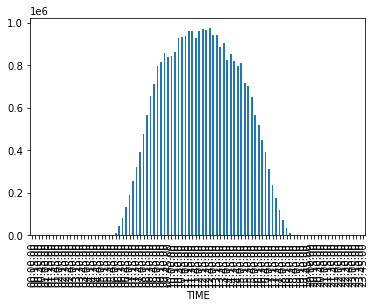

In [29]:
# aggregate AC Power by time panel to see production curve
df.groupby('TIME').sum().AC_POWER.plot.bar()

In [30]:
# full bell curve values
# df.groupby('TIME').sum()['AC_POWER'][df.groupby('TIME').sum()['AC_POWER']>0]

# hourly values of the bell curve above (smaller output)
df.groupby('TIME').sum()['AC_POWER'][df.groupby('TIME').sum()['AC_POWER']>0][0::4]

TIME
05:45:00         8.711429
06:45:00    130100.394644
07:45:00    389782.657024
08:45:00    709929.927738
09:45:00    838778.754376
10:45:00    931427.192385
11:45:00    927877.334886
12:45:00    974764.686546
13:45:00    905855.883935
14:45:00    793479.952509
15:45:00    650930.230476
16:45:00    391505.537858
17:45:00    117015.575237
18:45:00       310.293333
Name: AC_POWER, dtype: float64

In [31]:
# # df.groupby('TIME').sum()['AC_POWER'][df.groupby('TIME').sum()['AC_POWER']>0]
# times when AC power is non zero
sunlight_filter = df.groupby('TIME').sum()['AC_POWER'] > 0

# all non zero times when production occurs
sunlight_times = df.groupby('TIME').sum()['AC_POWER'][sunlight_filter].index

In [32]:
def get_daylight_times(df:pd.DataFrame) -> pd.Series:
    """
    Returns the range of daylight times for a fleet over many months
    
    Daylight can begin and end at a different times throughout the year for different sites. We assume daylight is any time when the solar production is non-zero. 
    We use AC Power as a proxy variable for solar production. If the sun is in the sky, then we assume that solar production is occuring. Each day might have a 
    different daylight start time, so to generalize the model, we look across all days in this dataframe for earliest and latest daylight times and use this as our range.
    
    Assumptions:
        daylight begins when solar production starts
        daylight ends when solar production finishes for the day
        
    output:
        an ordered series of the times when AC Power was non zero for any site, on any day
        
    """
    
    # times when AC power is non zero
    sunlight_filter = df.groupby('TIME').sum()['AC_POWER'] > 0

    # all non zero times when production occurs
    daylight_times = df.groupby('TIME').sum()['AC_POWER'][sunlight_filter].index
    
    
    return daylight_times

def create_is_daylight_feature(df:pd.DataFrame, sunlight_times:pd.Series=None) -> pd.DataFrame:
    """
    Creates a new feature for the dataframe called is_daylight. is_daylight is a binary variable that represents if the record occured during a time when the sun could be in the sky and 
    solar production could occur. When is_daylight is 0, the probability that the sun is in the sky and solar production can occur is 0. When is_daylight is 1, the sun is up and solar production can occur, but
    is not guaranteed.
    
    output:
        a dataframe with the new feature
    """
    if sunlight_times is None:
        sunlight_times = get_daylight_times(df)
    
    df['is_daytime'] = df.TIME.isin(sunlight_times).astype(int)
    
    return df

## When is sunrise?

In [33]:
sun_rise = min(sunlight_times)
sun_rise

'05:45:00'

## When is sunset?

In [34]:
sun_set = max(sunlight_times)
sun_set

'18:45:00'

In [35]:
sun_rise = min(sunlight_times)
sun_rise
sun_set = max(sunlight_times)
sun_set
print(f'sunrise is the earliest time when solar production occurs. The earliest sunrise time is {sun_rise}\nthe sunset is the latest time when solar production occurs. The latest sunset in the training data occurs at {sun_set}')

sunrise is the earliest time when solar production occurs. The earliest sunrise time is 05:45:00
the sunset is the latest time when solar production occurs. The latest sunset in the training data occurs at 18:45:00


In [36]:
## New feature - is_daytime
df['is_daytime'] = df.TIME.isin(sunlight_times).astype(int)
df.head()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,WEATHER_SOURCE,DATE,TIME,is_daytime
DATE_TIME,,,,,,,,,,,,,
2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6.259559e+06,25.184316,22.857507,0.000000,HmiyD2TTLFNqkNe,2020-05-15,00:00:00,0
2020-05-15 15:45:00,4136001,oZ35aAeoifZaQzV,782.357143,765.842857,6301.500000,1.659971e+09,36.755735,44.975190,0.505614,iq8k7ZNt4Mwm3w0,2020-05-15,15:45:00,1
2020-05-15 15:45:00,4136001,mqwcsP2rE7J0TFp,739.653333,724.226667,8703.800000,5.935887e+08,36.755735,44.975190,0.505614,iq8k7ZNt4Mwm3w0,2020-05-15,15:45:00,1
2020-05-15 15:45:00,4136001,WcxssY2VbP4hApt,770.320000,754.113333,8870.866667,1.817041e+08,36.755735,44.975190,0.505614,iq8k7ZNt4Mwm3w0,2020-05-15,15:45:00,1
2020-05-15 15:45:00,4136001,V94E5Ben1TlhnDV,760.442857,744.478571,8618.285714,1.412092e+09,36.755735,44.975190,0.505614,iq8k7ZNt4Mwm3w0,2020-05-15,15:45:00,1


## Does yesterdays daily production predict today's production?
In some cases, past performance can be predictive of future results. Here we test the hypothesis that prior days total yield are correlated with tomorrow's total yield.

In [71]:
df[df['SOURCE_KEY'] == 'oZ35aAeoifZaQzV'].sort_index().head()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,WEATHER_SOURCE,DATE,TIME,is_daytime,yesterday_max_yield
DATE_TIME,,,,,,,,,,,,,,
2020-05-15 00:00:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,1281.466667,1.659965e+09,27.004764,25.060789,0.0,iq8k7ZNt4Mwm3w0,2020-05-15,00:00:00,0,NaN
2020-05-15 00:15:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,0.000000,1.659965e+09,26.880811,24.421869,0.0,iq8k7ZNt4Mwm3w0,2020-05-15,00:15:00,0,NaN
2020-05-15 00:30:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,0.000000,1.659965e+09,26.682055,24.427290,0.0,iq8k7ZNt4Mwm3w0,2020-05-15,00:30:00,0,NaN
2020-05-15 00:45:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,0.000000,1.659965e+09,26.500589,24.420678,0.0,iq8k7ZNt4Mwm3w0,2020-05-15,00:45:00,0,NaN
2020-05-15 01:00:00,4136001,oZ35aAeoifZaQzV,0.0,0.0,0.000000,1.659965e+09,26.596148,25.088210,0.0,iq8k7ZNt4Mwm3w0,2020-05-15,01:00:00,0,NaN


In [72]:
# get latest time for each date
df.groupby(by=['DATE','SOURCE_KEY'])['TIME'].max().reset_index().head()

,DATE,SOURCE_KEY,TIME
0,2020-05-15,1BY6WEcLGh8j5v7,23:00:00
1,2020-05-15,1IF53ai7Xc0U56Y,23:00:00
2,2020-05-15,3PZuoBAID5Wc2HD,23:00:00
3,2020-05-15,4UPUqMRk7TRMgml,23:45:00
4,2020-05-15,7JYdWkrLSPkdwr4,23:00:00


## Day before total yield

In [39]:
# Day before total yield
temp = df
max_yield = df.groupby(["SOURCE_KEY","DATE"])["TOTAL_YIELD"].max().reset_index()
max_yield['MAX_YIELD'] = max_yield["TOTAL_YIELD"]
max_yield

,SOURCE_KEY,DATE,TOTAL_YIELD,MAX_YIELD
0,1BY6WEcLGh8j5v7,2020-05-15,6265313.0,6265313.0
1,1BY6WEcLGh8j5v7,2020-05-16,6271605.0,6271605.0
2,1BY6WEcLGh8j5v7,2020-05-17,6278650.0,6278650.0
3,1BY6WEcLGh8j5v7,2020-05-18,6283648.0,6283648.0
4,1BY6WEcLGh8j5v7,2020-05-19,6290097.0,6290097.0
...,...,...,...,...
1195,zVJPv84UY57bAof,2020-06-07,7293790.0,7293790.0
1196,zVJPv84UY57bAof,2020-06-08,7302167.0,7302167.0
1197,zVJPv84UY57bAof,2020-06-09,7310456.0,7310456.0
1198,zVJPv84UY57bAof,2020-06-10,7317016.0,7317016.0


In [40]:
shifted_max_yield = max_yield
shifted_max_yield["yesterday_max_yield"] = max_yield["MAX_YIELD"].shift(1)
shifted_max_yield

,SOURCE_KEY,DATE,TOTAL_YIELD,MAX_YIELD,yesterday_max_yield
0,1BY6WEcLGh8j5v7,2020-05-15,6265313.0,6265313.0,NaN
1,1BY6WEcLGh8j5v7,2020-05-16,6271605.0,6271605.0,6265313.0
2,1BY6WEcLGh8j5v7,2020-05-17,6278650.0,6278650.0,6271605.0
3,1BY6WEcLGh8j5v7,2020-05-18,6283648.0,6283648.0,6278650.0
4,1BY6WEcLGh8j5v7,2020-05-19,6290097.0,6290097.0,6283648.0
...,...,...,...,...,...
1195,zVJPv84UY57bAof,2020-06-07,7293790.0,7293790.0,7285530.0
1196,zVJPv84UY57bAof,2020-06-08,7302167.0,7302167.0,7293790.0
1197,zVJPv84UY57bAof,2020-06-09,7310456.0,7310456.0,7302167.0
1198,zVJPv84UY57bAof,2020-06-10,7317016.0,7317016.0,7310456.0


In [41]:
shifted_max_yield = shifted_max_yield[["SOURCE_KEY","DATE","yesterday_max_yield"]]

In [42]:
1+1

2

In [73]:
# df_yields = pd.merge(temp, shifted_max_yield, how="inner", on=['SOURCE_KEY','DATE'])
df_yields[["TOTAL_YIELD", "yesterday_max_yield"]].corr()
# df['yesterday_max_yield'] = df_yields['yesterday_max_yield']


,TOTAL_YIELD,yesterday_max_yield
TOTAL_YIELD,1.000000,0.965489
yesterday_max_yield,0.965489,1.000000


<AxesSubplot:xlabel='DATE'>

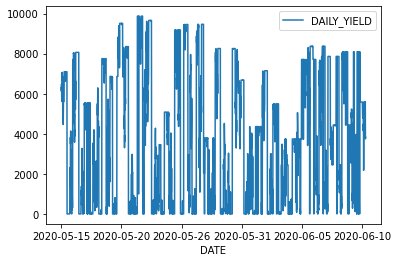

In [78]:
# df[df['SOURCE_KEY'] == 'oZ35aAeoifZaQzV'].plot.bar(x='DATE', y=["TOTAL_YIELD", "yesterday_max_yield"])
df[df['SOURCE_KEY'] == 'oZ35aAeoifZaQzV'].plot.line(x='DATE',y='DAILY_YIELD')
# df[df['SOURCE_KEY'] == 'oZ35aAeoifZaQzV'].groupby('DATE').min()

In [85]:
df.SOURCE_KEY.unique()

array(['1BY6WEcLGh8j5v7', 'oZ35aAeoifZaQzV', 'mqwcsP2rE7J0TFp',
       'WcxssY2VbP4hApt', 'V94E5Ben1TlhnDV', 'Quc1TzYxW2pYoWX',
       'Qf4GUc1pJu5T6c6', 'PeE6FRyGXUgsRhN', 'NgDl19wMapZy17u',
       'Mx2yZCDsyf6DPfv', 'LlT2YUhhzqhg5Sw', 'LYwnQax7tkwH5Cb',
       'IQ2d7wF4YD8zU1Q', 'Et9kgGMDl729KT4', 'oZZkBaNadn6DNKz',
       '9kRcWv60rDACzjR', '4UPUqMRk7TRMgml', 'xoJJ8DcxJEcupym',
       'xMbIugepa2P7lBB', 'vOuJvMaM2sgwLmb', 'rrq4fwE8jgrTyWY',
       'q49J1IKaHRwDQnt', '81aHJ1q11NBPMrL', 'WRmjgnKYAwPKWDb',
       'bvBOhCH3iADSZry', 'adLQvlD726eNBSB', 'ZoEaEvLYb1n2sOq',
       'ZnxXDlPa8U1GXgE', 'YxYtjZvoooNbGkE', 'VHMLBKoKgIrUVDU',
       'McdE0feGgRqW7Ca', '7JYdWkrLSPkdwr4', '3PZuoBAID5Wc2HD',
       '1IF53ai7Xc0U56Y', 'iCRJl6heRkivqQ3', 'zVJPv84UY57bAof',
       'z9Y9gH1T5YWrNuG', 'wCURE6d3bPkepu2', 'uHbuxQJl8lW7ozc',
       'sjndEbLyjtCKgGv', 'rGa61gmuvPhdLxV', 'pkci93gMrogZuBj',
       'ih0vzX44oOqAx2f', 'zBIq5rxdHJRwDNY'], dtype=object)

## Rolling past 7 day average
TODO

In [61]:
df.groupby(["SOURCE_KEY","DATE"])["TOTAL_YIELD"]

In [70]:
df[df['SOURCE_KEY'] == 'oZ35aAeoifZaQzV']['TOTAL_YIELD'].resample("1D").mean()

DATE_TIME
2020-05-15    1.658804e+09
2020-05-16    1.658823e+09
2020-05-17    1.655372e+09
2020-05-18    1.659989e+09
2020-05-19    1.651194e+09
2020-05-20    1.660010e+09
2020-05-21    1.643875e+09
2020-05-22    1.660023e+09
2020-05-23    1.658880e+09
2020-05-24    1.660040e+09
2020-05-25    1.660047e+09
2020-05-26    1.660057e+09
2020-05-27    1.660066e+09
2020-05-28    1.590903e+09
2020-05-29    1.660079e+09
2020-05-30    1.660087e+09
2020-05-31    1.660095e+09
2020-06-01    1.649615e+09
2020-06-02    1.596287e+09
2020-06-03    1.644967e+09
2020-06-04    1.660117e+09
2020-06-05    1.658970e+09
2020-06-06    1.634520e+09
2020-06-07    1.619211e+09
2020-06-08    1.658992e+09
2020-06-09    1.651504e+09
2020-06-10    1.606549e+09
2020-06-11    1.641716e+09
Freq: D, Name: TOTAL_YIELD, dtype: float64

## 4 Multivariate analysis

In [46]:
df.head()

,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,WEATHER_SOURCE,DATE,TIME,is_daytime,yesterday_max_yield
DATE_TIME,,,,,,,,,,,,,,
2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6.259559e+06,25.184316,22.857507,0.000000,HmiyD2TTLFNqkNe,2020-05-15,00:00:00,0,NaN
2020-05-15 15:45:00,4136001,oZ35aAeoifZaQzV,782.357143,765.842857,6301.500000,1.659971e+09,36.755735,44.975190,0.505614,iq8k7ZNt4Mwm3w0,2020-05-15,15:45:00,1,NaN
2020-05-15 15:45:00,4136001,mqwcsP2rE7J0TFp,739.653333,724.226667,8703.800000,5.935887e+08,36.755735,44.975190,0.505614,iq8k7ZNt4Mwm3w0,2020-05-15,15:45:00,1,NaN
2020-05-15 15:45:00,4136001,WcxssY2VbP4hApt,770.320000,754.113333,8870.866667,1.817041e+08,36.755735,44.975190,0.505614,iq8k7ZNt4Mwm3w0,2020-05-15,15:45:00,1,NaN
2020-05-15 15:45:00,4136001,V94E5Ben1TlhnDV,760.442857,744.478571,8618.285714,1.412092e+09,36.755735,44.975190,0.505614,iq8k7ZNt4Mwm3w0,2020-05-15,15:45:00,1,NaN


# How does sunlight hours effect total yield?

In [47]:
features = list(set(df.columns) - set(['DATE_TIME']))#,'DAILY_YIELD']))
outcome = 'DAILY_YIELD'
df[features].corr()

,TOTAL_YIELD,is_daytime,DC_POWER,AC_POWER,IRRADIATION,DAILY_YIELD,AMBIENT_TEMPERATURE,yesterday_max_yield,MODULE_TEMPERATURE
TOTAL_YIELD,1.000000,-0.011016,-0.039205,-0.039254,0.002331,-0.027843,0.184234,NaN,0.038937
is_daytime,-0.011016,1.000000,0.646009,0.646557,0.680005,0.012039,0.556706,NaN,0.698436
DC_POWER,-0.039205,0.646009,1.000000,0.999997,0.880889,0.059486,0.566478,NaN,0.851316
AC_POWER,-0.039254,0.646557,0.999997,1.000000,0.880806,0.059417,0.566652,NaN,0.851368
IRRADIATION,0.002331,0.680005,0.880889,0.880806,1.000000,-0.002606,0.647296,NaN,0.951070
DAILY_YIELD,-0.027843,0.012039,0.059486,0.059417,-0.002606,1.000000,0.403682,NaN,0.143998
AMBIENT_TEMPERATURE,0.184234,0.556706,0.566478,0.566652,0.647296,0.403682,1.000000,NaN,0.812396
yesterday_max_yield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MODULE_TEMPERATURE,0.038937,0.698436,0.851316,0.851368,0.951070,0.143998,0.812396,NaN,1.000000


In [48]:
# drop night time values
sunlight_hours = (df['TIME'] > '05:00:00') &  (df['TIME'] < '20:00:00')
df.loc[sunlight_hours, features].corr()

,TOTAL_YIELD,is_daytime,DC_POWER,AC_POWER,IRRADIATION,DAILY_YIELD,AMBIENT_TEMPERATURE,yesterday_max_yield,MODULE_TEMPERATURE
TOTAL_YIELD,1.000000,-0.011251,-0.054135,-0.054229,0.011202,-0.044808,0.195817,NaN,0.027911
is_daytime,-0.011251,1.000000,0.368960,0.369424,0.398906,-0.114314,0.229939,NaN,0.393258
DC_POWER,-0.054135,0.368960,1.000000,0.999995,0.819662,0.045687,0.408588,NaN,0.780027
AC_POWER,-0.054229,0.369424,0.999995,1.000000,0.819429,0.045540,0.408623,NaN,0.779944
IRRADIATION,0.011202,0.398906,0.819662,0.819429,1.000000,-0.064434,0.523750,NaN,0.932913
DAILY_YIELD,-0.044808,-0.114314,0.045687,0.045540,-0.064434,1.000000,0.502065,NaN,0.141694
AMBIENT_TEMPERATURE,0.195817,0.229939,0.408588,0.408623,0.523750,0.502065,1.000000,NaN,0.733779
yesterday_max_yield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MODULE_TEMPERATURE,0.027911,0.393258,0.780027,0.779944,0.932913,0.141694,0.733779,NaN,1.000000


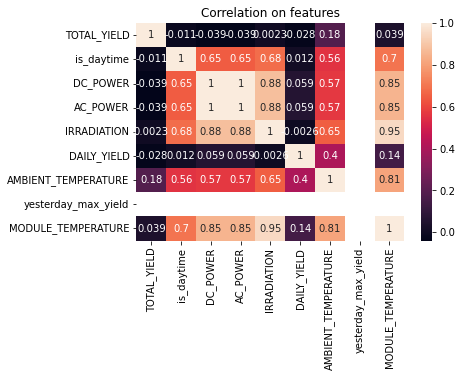

In [49]:
corr = df[features].corr()
ax = plt.axes()
sns.heatmap(corr, annot=True) #, cmap="Blues", annot=True)
ax.set_title('Correlation on features')
plt.show()

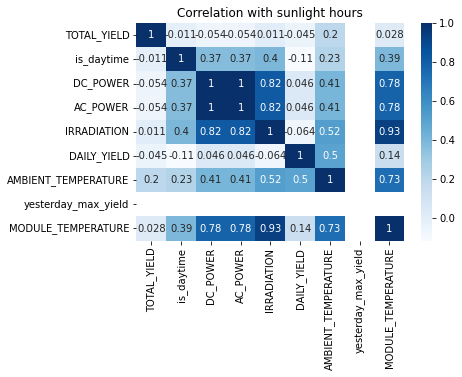

In [50]:

corr_sun = df.loc[sunlight_hours, features].corr()
ax = plt.axes()
sns.heatmap(corr_sun, annot=True, cmap="Blues") #, cmap="Blues", annot=True)
ax.set_title('Correlation with sunlight hours')
plt.show()


In [51]:
abs(abs(corr_sun['TOTAL_YIELD']) - abs(corr['TOTAL_YIELD']))

TOTAL_YIELD            0.000000
is_daytime             0.000235
DC_POWER               0.014931
AC_POWER               0.014975
IRRADIATION            0.008871
DAILY_YIELD            0.016965
AMBIENT_TEMPERATURE    0.011583
yesterday_max_yield         NaN
MODULE_TEMPERATURE     0.011026
Name: TOTAL_YIELD, dtype: float64

In [52]:
df_corr = pd.DataFrame([corr['TOTAL_YIELD'],corr_sun['TOTAL_YIELD'],abs(corr_sun['TOTAL_YIELD']) - abs(corr['TOTAL_YIELD'])]).T

In [53]:
df_corr.columns = ['all times','only daylight','absolute delta']
df_corr.index.name = 'correlation to Outcome Variable (total yield)'

In [54]:
df_corr

,all times,only daylight,absolute delta
correlation to Outcome Variable (total yield),,,
TOTAL_YIELD,1.000000,1.000000,0.000000
is_daytime,-0.011016,-0.011251,0.000235
DC_POWER,-0.039205,-0.054135,0.014931
AC_POWER,-0.039254,-0.054229,0.014975
IRRADIATION,0.002331,0.011202,0.008871
DAILY_YIELD,-0.027843,-0.044808,0.016965
AMBIENT_TEMPERATURE,0.184234,0.195817,0.011583
yesterday_max_yield,NaN,NaN,NaN
MODULE_TEMPERATURE,0.038937,0.027911,-0.011026


In [55]:
# New feature